In [2]:
import pandas as pd
df = pd.read_csv("telecom_churn.csv")
df.head(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='Churn'>

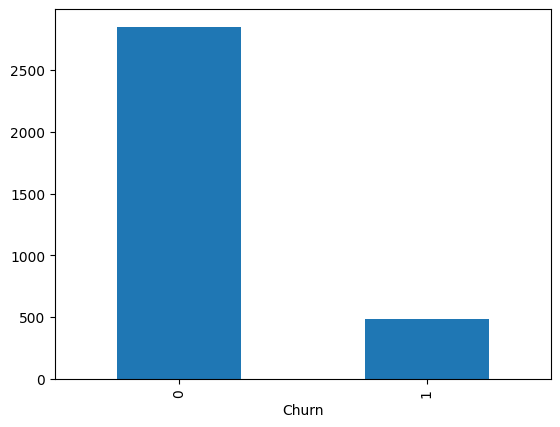

In [5]:
df.Churn.value_counts().plot(kind = 'bar')

In [6]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [20]:
X= df.drop(['Churn','ContractRenewal'],axis='columns')
y = df['Churn']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y, random_state=42)


### train model

In [22]:
model = LogisticRegression(max_iter=0)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
report= classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       570
           1       0.00      0.00      0.00        97

    accuracy                           0.85       667
   macro avg       0.43      0.50      0.46       667
weighted avg       0.73      0.85      0.79       667



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classifica

In [23]:
y_train.value_counts()

Churn
0    2280
1     386
Name: count, dtype: int64

### random_under_sampler

In [24]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)
y_train_rus.value_counts()

Churn
0    386
1    386
Name: count, dtype: int64

In [25]:
model = LogisticRegression(max_iter=0)
model.fit(X_train_rus,y_train_rus)

y_pred_rus = model.predict(X_test)
report= classification_report(y_test,y_pred_rus)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.15      1.00      0.25        97

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classifica

### over_sampling : SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
y_train_smote.value_counts()

Churn
0    2280
1    2280
Name: count, dtype: int64

In [27]:
model = LogisticRegression(max_iter=0)
model.fit(X_train_smote,y_train_smote)

y_pred_smote = model.predict(X_test)
report= classification_report(y_test,y_pred_smote)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.15      1.00      0.25        97

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classifica

### smote_tomek

In [28]:
from imblearn.combine import SMOTETomek

tomek = SMOTETomek(random_state=42)
X_train_tomek,y_train_tomek=tomek.fit_resample(X_train,y_train)
y_train_tomek.value_counts()

Churn
0    2229
1    2229
Name: count, dtype: int64

In [17]:
model = LogisticRegression(max_iter=0)
model.fit(X_train_tomek,y_train_tomek)

y_pred_tomek= model.predict(X_test)
report= classification_report(y_test,y_pred_tomek)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       570
           1       0.15      1.00      0.25        97

    accuracy                           0.15       667
   macro avg       0.07      0.50      0.13       667
weighted avg       0.02      0.15      0.04       667



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classifica